**Graph data set - ANN - Car Sales Price**

**Exploratory Data Analysis (EDA)**

**Load the datasets**

In [ ]:
import pandas as pd

# Load the datasets
from google.colab import files
uploaded = files.upload()
edges_df = pd.read_csv("edges_dataset.csv")
nodes_df = pd.read_csv("nodes_dataset.csv")

# Display the first few rows of each dataset
edges_head = edges_df.head()
nodes_head = nodes_df.head()

edges_head, nodes_head

Saving edges_dataset.csv to edges_dataset.csv
Saving nodes_dataset.csv to nodes_dataset.csv


(   source_node_id  target_node_id    weight
 0             362              85  0.000201
 1             362             496  0.000403
 2             362             317  0.001088
 3             362             409  0.000408
 4             362             492  0.000244,
    node_id    customer name  annual Salary
 0        1    Martina Avila    62812.09301
 1        2    Harlan Barnes    66646.89292
 2        3  Naomi Rodriquez    53798.55112
 3        4  Jade Cunningham    79370.03798
 4        5     Cedric Leach    59729.15130)

**Understand the Structure**

In [ ]:
# Get the info of each dataset
edges_info = edges_df.info()
nodes_info = nodes_df.info()

edges_info, nodes_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_node_id  2502 non-null   int64  
 1   target_node_id  2502 non-null   int64  
 2   weight          2502 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 58.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   node_id        500 non-null    int64  
 1   customer name  500 non-null    object 
 2   annual Salary  500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


(None, None)

**Visualize Missing Values**

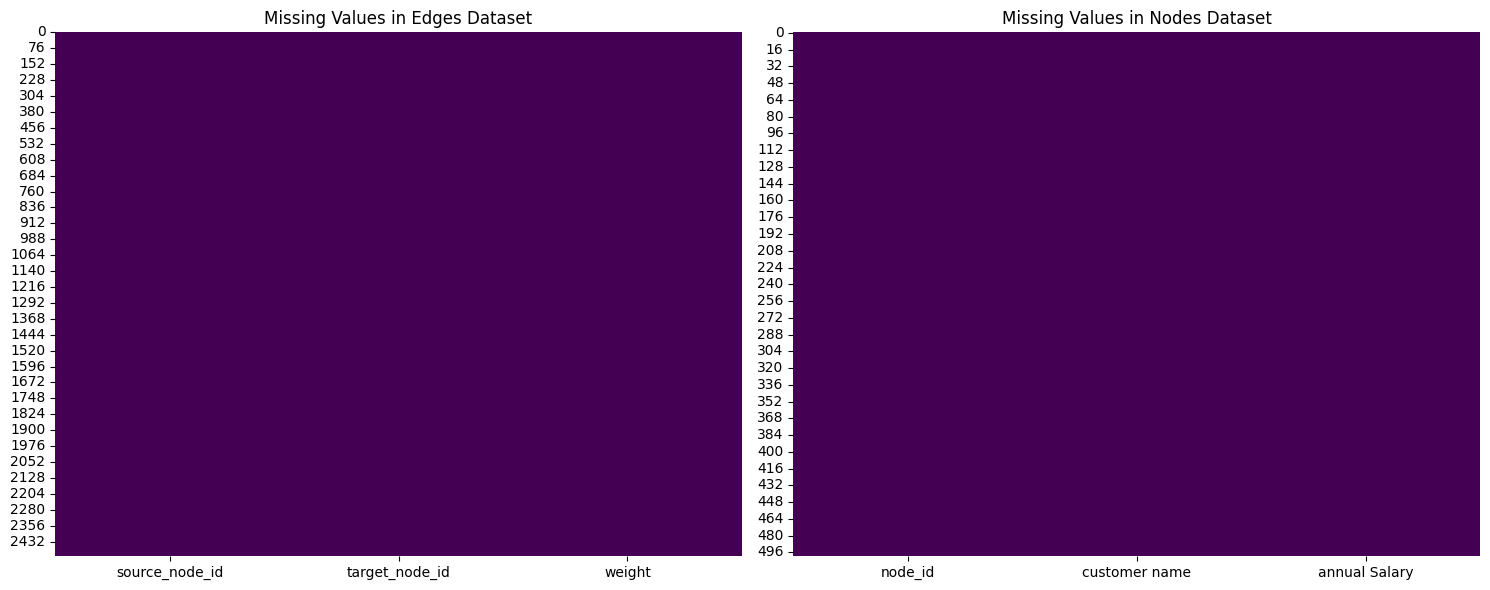

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot missing values heatmap for both datasets
sns.heatmap(edges_df.isnull(), cbar=False, cmap='viridis', ax=ax[0])
ax[0].set_title('Missing Values in Edges Dataset')
sns.heatmap(nodes_df.isnull(), cbar=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Missing Values in Nodes Dataset')

plt.tight_layout()
plt.show()

**Check for Duplicates**

In [ ]:
# Check for duplicate rows in both datasets
edges_duplicates = edges_df.duplicated().sum()
nodes_duplicates = nodes_df.duplicated().sum()

edges_duplicates, nodes_duplicates

(0, 0)

**Distribution of Various Features**

**visualizations **

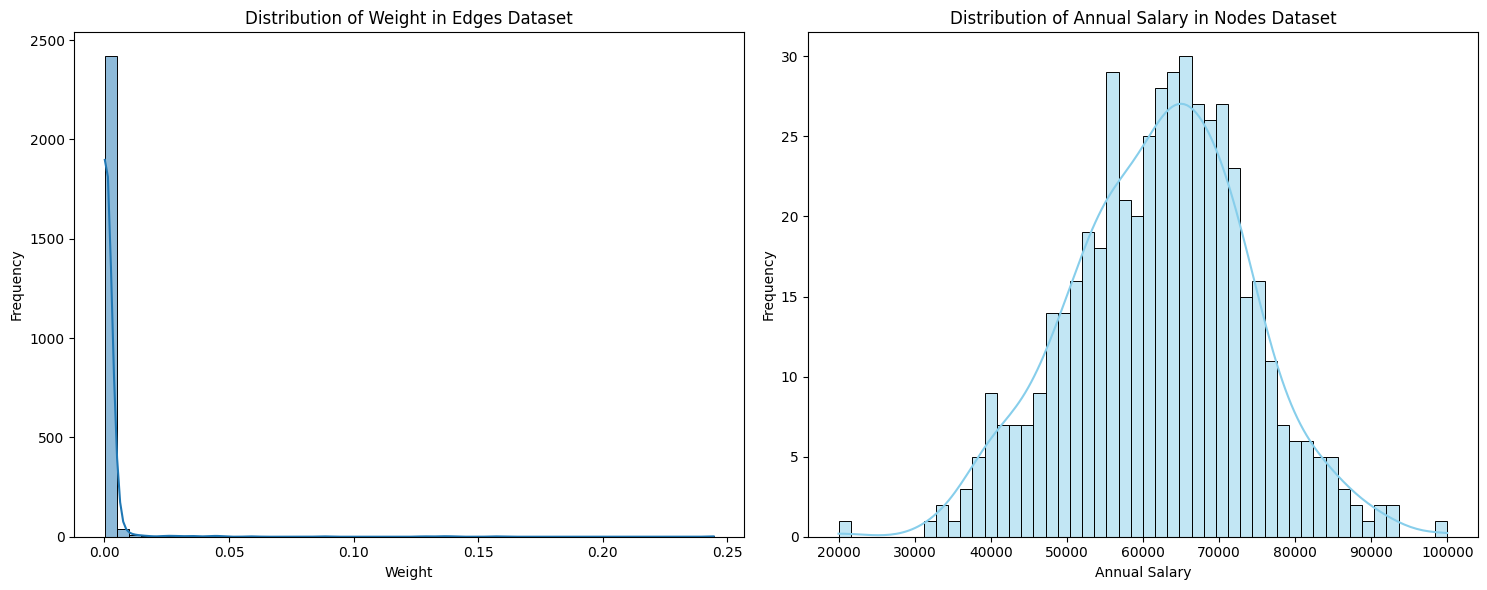

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot distribution for weight in edges dataset
sns.histplot(edges_df['weight'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Weight in Edges Dataset')
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Frequency')

# Plot distribution for annual Salary in nodes dataset
sns.histplot(nodes_df['annual Salary'], bins=50, kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Distribution of Annual Salary in Nodes Dataset')
ax[1].set_xlabel('Annual Salary')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-6-2f7c8f7dc6e4>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  degree_distribution = edges_df['source_node_id'].append(edges_df['target_node_id']).value_counts()


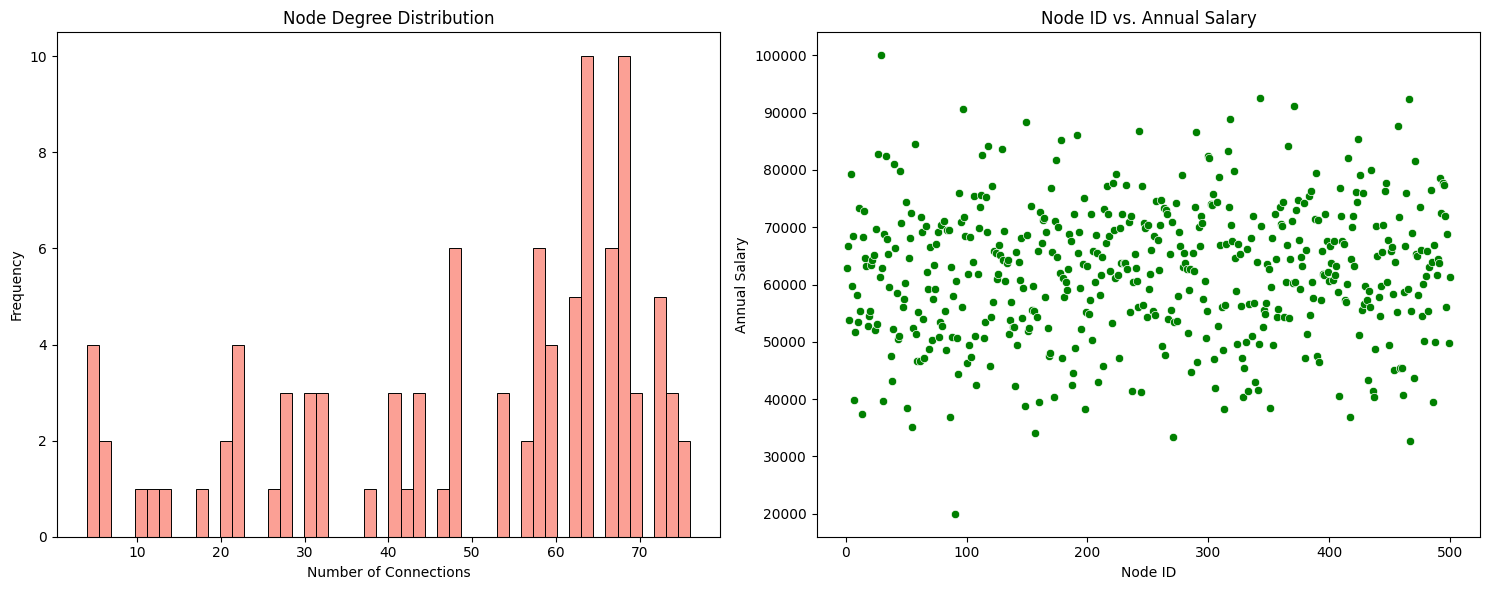

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Calculate degree distribution for nodes (using both source and target node columns)
degree_distribution = edges_df['source_node_id'].append(edges_df['target_node_id']).value_counts()

# Plot degree distribution
sns.histplot(degree_distribution, bins=50, ax=ax[0], color='salmon')
ax[0].set_title('Node Degree Distribution')
ax[0].set_xlabel('Number of Connections')
ax[0].set_ylabel('Frequency')

# Scatter plot of node_id vs. annual Salary
sns.scatterplot(x=nodes_df['node_id'], y=nodes_df['annual Salary'], ax=ax[1], color='green')
ax[1].set_title('Node ID vs. Annual Salary')
ax[1].set_xlabel('Node ID')
ax[1].set_ylabel('Annual Salary')

plt.tight_layout()
plt.show()

**Data Preprocessing & Cleaning**

**Outlier Detection and Treatment**

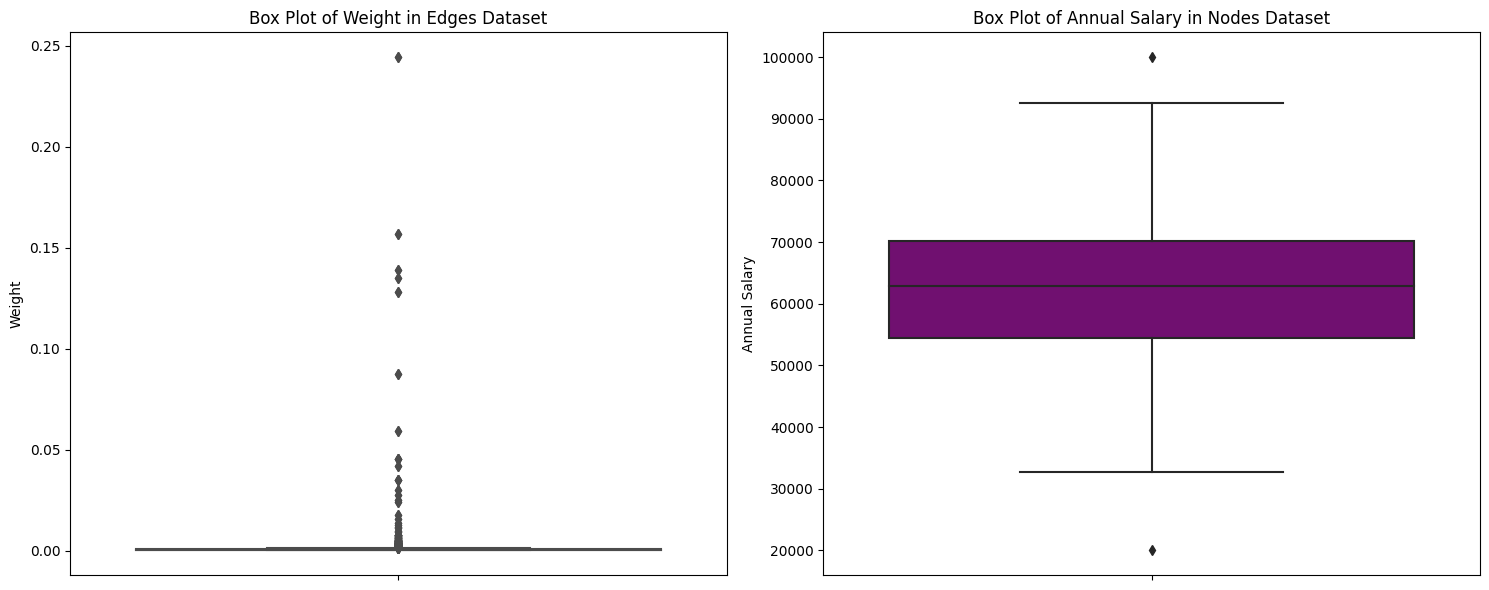

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Box plot for weight in edges dataset
sns.boxplot(y=edges_df['weight'], ax=ax[0], color='orange')
ax[0].set_title('Box Plot of Weight in Edges Dataset')
ax[0].set_ylabel('Weight')

# Box plot for annual Salary in nodes dataset
sns.boxplot(y=nodes_df['annual Salary'], ax=ax[1], color='purple')
ax[1].set_title('Box Plot of Annual Salary in Nodes Dataset')
ax[1].set_ylabel('Annual Salary')

plt.tight_layout()
plt.show()

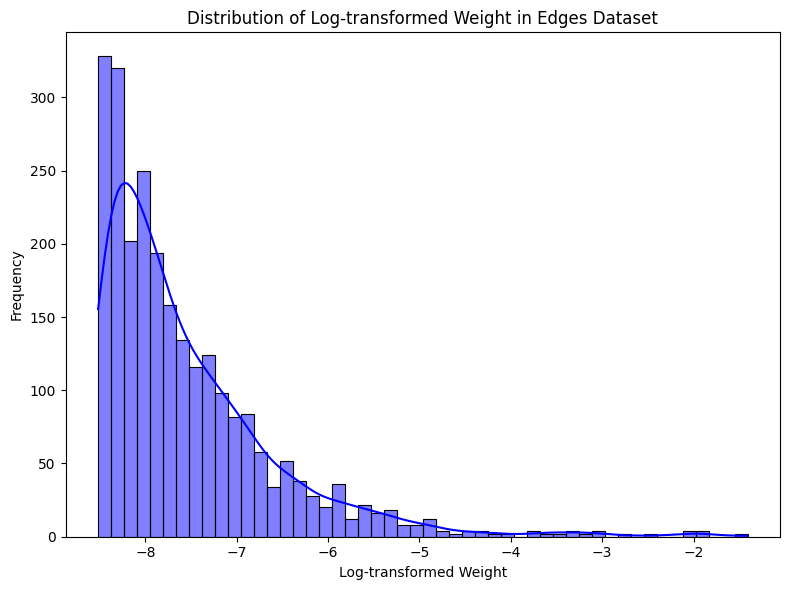

In [ ]:
import numpy as np

# Apply log transformation to the 'weight' column (adding a small constant to avoid log(0))
edges_df['log_weight'] = np.log(edges_df['weight'] + 1e-10)

# Plot the distribution of the transformed 'log_weight' column
plt.figure(figsize=(8, 6))
sns.histplot(edges_df['log_weight'], bins=50, kde=True, color='blue')
plt.title('Distribution of Log-transformed Weight in Edges Dataset')
plt.xlabel('Log-transformed Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Feature Processing & Selection**

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a standard scaler
scaler = StandardScaler()

# Scale the 'log_weight' column in edges dataset
edges_df['scaled_log_weight'] = scaler.fit_transform(edges_df[['log_weight']])

# Scale the 'annual Salary' column in nodes dataset
nodes_df['scaled_annual_salary'] = scaler.fit_transform(nodes_df[['annual Salary']])

# Display the first few rows of the transformed datasets
scaled_edges_head = edges_df.head()
scaled_nodes_head = nodes_df.head()

scaled_edges_head, scaled_nodes_head

(   source_node_id  target_node_id    weight  log_weight  scaled_log_weight
 0             362              85  0.000201   -8.510649          -0.979328
 1             362             496  0.000403   -7.815489          -0.277706
 2             362             317  0.001088   -6.823262           0.723745
 3             362             409  0.000408   -7.804212          -0.266324
 4             362             492  0.000244   -8.318525          -0.785419,
    node_id    customer name  annual Salary  scaled_annual_salary
 0        1    Martina Avila    62812.09301              0.058576
 1        2    Harlan Barnes    66646.89292              0.386570
 2        3  Naomi Rodriquez    53798.55112             -0.712361
 3        4  Jade Cunningham    79370.03798              1.474794
 4        5     Cedric Leach    59729.15130             -0.205111)

**Clustering and Anomaly Detection**

**Clustering using DBSCAN on the nodes dataset**

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering on the scaled_annual_salary feature
dbscan = DBSCAN(eps=0.5, min_samples=5)
nodes_df['cluster'] = dbscan.fit_predict(nodes_df[['scaled_annual_salary']])

# Count of data points in each cluster
cluster_counts = nodes_df['cluster'].value_counts()

cluster_counts

 0    498
-1      2
Name: cluster, dtype: int64

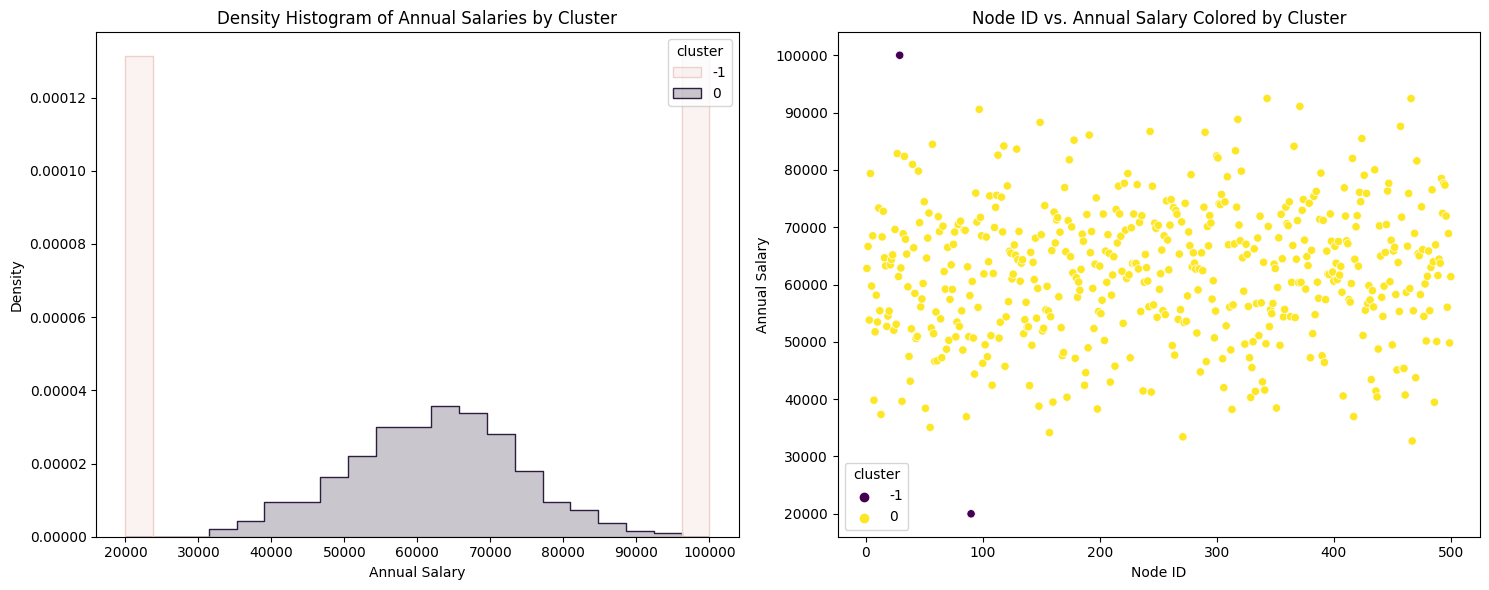

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram of annual salaries by cluster
sns.histplot(data=nodes_df, x='annual Salary', hue='cluster', element='step', stat='density', common_norm=False, ax=ax[0])
ax[0].set_title('Density Histogram of Annual Salaries by Cluster')
ax[0].set_xlabel('Annual Salary')
ax[0].set_ylabel('Density')

# Scatter plot of node_id vs. annual Salary colored by cluster
sns.scatterplot(data=nodes_df, x='node_id', y='annual Salary', hue='cluster', palette='viridis', ax=ax[1])
ax[1].set_title('Node ID vs. Annual Salary Colored by Cluster')
ax[1].set_xlabel('Node ID')
ax[1].set_ylabel('Annual Salary')

plt.tight_layout()
plt.show()

**Anomaly Detection using Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest_edges = IsolationForest(contamination=0.05)  # Assuming ~5% of the data might be anomalous
iso_forest_nodes = IsolationForest(contamination=0.05)

# Fit the model and predict anomalies for edges dataset on scaled_log_weight feature
edges_df['anomaly'] = iso_forest_edges.fit_predict(edges_df[['scaled_log_weight']])

# Fit the model and predict anomalies for nodes dataset on scaled_annual_salary feature
nodes_df['anomaly'] = iso_forest_nodes.fit_predict(nodes_df[['scaled_annual_salary']])

# Count of anomalies in each dataset
anomaly_counts_edges = edges_df['anomaly'].value_counts()
anomaly_counts_nodes = nodes_df['anomaly'].value_counts()

anomaly_counts_edges, anomaly_counts_nodes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


( 1    2376
 -1     126
 Name: anomaly, dtype: int64,
  1    475
 -1     25
 Name: anomaly, dtype: int64)

**Model Building with AutoML**

In [ ]:
# Compute degree for each node
degree = edges_df['source_node_id'].append(edges_df['target_node_id']).value_counts()
nodes_df['degree'] = nodes_df['node_id'].map(degree).fillna(0)

# Compute average weight of connections for each node
avg_weight_source = edges_df.groupby('source_node_id')['weight'].mean()
avg_weight_target = edges_df.groupby('target_node_id')['weight'].mean()
nodes_df['avg_weight'] = nodes_df['node_id'].map(avg_weight_source).fillna(0) + nodes_df['node_id'].map(avg_weight_target).fillna(0)

# Display the first few rows of the updated nodes dataset
nodes_df.head()

<ipython-input-13-5f6d7e49a1ec>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  degree = edges_df['source_node_id'].append(edges_df['target_node_id']).value_counts()


,node_id,customer name,annual Salary,scaled_annual_salary,cluster,anomaly,degree,avg_weight
0,1,Martina Avila,62812.09301,0.058576,0,1,72.0,0.001383
1,2,Harlan Barnes,66646.89292,0.386570,0,1,0.0,0.000000
2,3,Naomi Rodriquez,53798.55112,-0.712361,0,1,54.0,0.001795
3,4,Jade Cunningham,79370.03798,1.474794,0,1,0.0,0.000000
4,5,Cedric Leach,59729.15130,-0.205111,0,1,0.0,0.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = nodes_df[['degree', 'avg_weight']]
y = nodes_df['annual Salary']

# Split the data into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((400, 2), (100, 2))

**Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# List of models
models = [linear_reg, decision_tree, random_forest]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model using cross-validation
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Convert negative MSE scores to positive for better interpretation
cv_scores = [-1 * score for score in cv_scores]
cv_scores_dict = dict(zip(model_names, cv_scores))
cv_scores_dict

{'Linear Regression': 142389584.08152327,
 'Decision Tree': 142389584.08152324,
 'Random Forest': 142353438.62481165}

**Hyperparameter Tuning for the Random Forest Regressor using GridSearchCV to find the optimal hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest Regressor
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

**Evaluate the model with the default parameters**

In [ ]:
# Train the Random Forest model with default parameters on the training data
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate the Mean Squared Error on the test set
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

118333611.82620217